X_train shape: (29, 200, 200, 3)
y_train shape: (29,)
y_train [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 5 5 5 5 5]


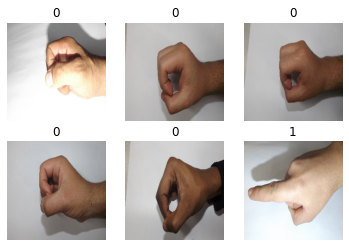

In [170]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the directory containing the digit folders
data_dir = 'dataset_sample/men/'

# Define the image size for preprocessing
img_size = (200, 200)

# Define the label names and corresponding integer values
label_names = ['0', '1', '2', '3', '4', '5']
label_dict = {label_names[i]: i for i in range(len(label_names))}

# Initialize empty lists for the images and labels
images = []
labels = []

# Loop over the digit folders
for label_name in label_names:
    # Get the path to the digit folder
    label_dir = os.path.join(data_dir, label_name)
    # Loop over the images in the digit folder
    for file_name in os.listdir(label_dir):
        # Get the path to the image file
        file_path = os.path.join(label_dir, file_name)
        # Load the image file and preprocess it
        img = cv2.imread(file_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img_rgb, img_size)
        img_normalized = img_resized / 255.0
        # Append the preprocessed image and corresponding label to the lists
        images.append(img_normalized)
        labels.append(label_dict[label_name])

# Convert the image and label lists to numpy arrays
X_train = np.array(images)
y_train = np.array(labels)

# Print the shape of the training data
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('y_train', y_train)
for i in range(0, 6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(label_names[y_train[i]])
    plt.axis('off')


In [241]:
def remove_shadows(image):
    # convert to LAB color space
    # print('image', image.dtype)
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        

    # split the LAB channels
    l, a, b = cv2.split(lab)
    
    # apply the Retinex algorithm to the L channel
    # set the gain to 128 for best results
    l = cv2.createCLAHE(clipLimit=1, tileGridSize=(3,3)).apply(l)
    # merge the LAB channels back together
    lab = cv2.merge((l,a,b))

    # convert back to BGR color space
    result = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    return result

In [246]:
X_train_processed = []
for i in range(len(X_train)):
    img = X_train[i]
    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U) # convert to 8-bit
    img = cv2.GaussianBlur(img, (3, 3), 0)
    # Apply Gaussian blur with kernel size of 3 
    img = remove_shadows(img)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
    # # Apply Canny edge detector with minVal of 100 and maxVal of 200
    img = cv2.Canny(img, 50, 200)
    # # Apply Otsu's thresholding
    # _, img_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Append the preprocessed image to the list
    X_train_processed.append(img)
X_train_processed = np.array(X_train_processed)
# Print the shape of the preprocessed training data
print('X_train_processed shape:', X_train_processed.shape)

X_train_processed shape: (29, 200, 200)


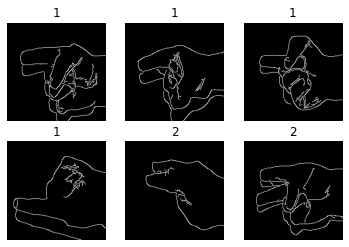

In [247]:
# Visualize the preprocessed images
for i in range(0, 6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(X_train_processed[i+6], cmap='gray')
    plt.title(label_names[y_train[i+6]])
    plt.axis('off')



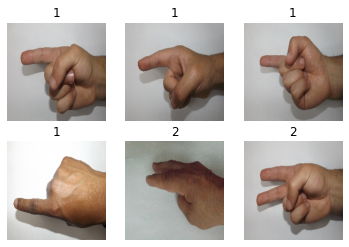

In [248]:
for i in range(0, 6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(X_train[i+6], cmap='gray')
    plt.title(label_names[y_train[i+6]])
    plt.axis('off')